# MATH50003 Numerical Analysis (2022–23)
# Problem Sheet 10


This problem sheet explores interpolation with Lagrange polynomials, interpolatory quadrature,
orthogonal polynomial roots and Gaussian quadrature.



----


**Problem 1** Use Lagrange interpolation to
interpolate the function $\cos x$ by a polynomial at the points
$[0,2,3,4]$ and evaluate at $x = 1$. 

**SOLUTION**

- $ℓ_0(x)=\frac{(x-2)(x-3)(x-4)}{(0-2)(0-3)(0-4)}=-\frac{1}{24}(x-2)(x-3)(x-4)$
- $ℓ_2(x)=\frac{(x-0)(x-3)(x-4)}{(2-0)(2-3)(2-4)}=\frac{1}{4}x(x-3)(x-4)$
- $ℓ_3(x)=\frac{(x-0)(x-2)(x-4)}{(3-0)(3-2)(3-4)}=-\frac{1}{3}x(x-2)(x-4)$
- $ℓ_4(x)=\frac{(x-0)(x-2)(x-3)}{(4-0)(4-2)(4-3)}=\frac{1}{8}x(x-2)(x-3)$

$p(x)=\cos(0)ℓ_0(x)+\cos(2)ℓ_2(x)+\cos(3)ℓ_3(x)+\cos(4)ℓ_4(x)$

$ℓ_0(1)=1/4$, $ℓ_2(1)=3/2$, $ℓ_3(1)=-1$, $ℓ_4(1)=1/4$, so $p(1)=1/4\cos(0)+3/2\cos(2)-\cos(3)+1/4\cos(4)$.

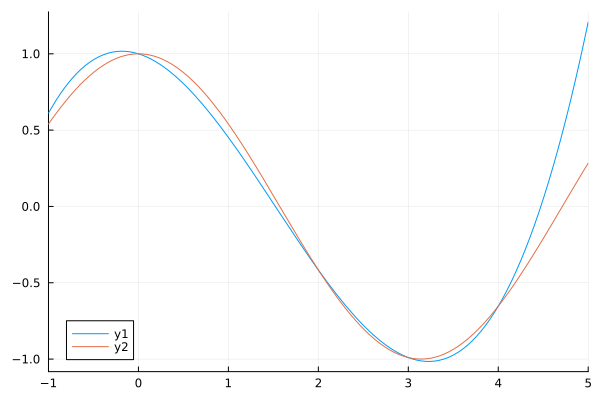

In [1]:
using Plots
l0(x)=-1/24*(x-2)*(x-3)*(x-4)
l2(x)=1/4*x*(x-3)*(x-4)
l3(x)=-1/3*x*(x-2)*(x-4)
l4(x)=1/8*x*(x-2)*(x-3)
p(x)=cos(0)*l0(x)+cos(2)*l2(x)+cos(3)*l3(x)+cos(4)*l4(x)

plot([p cos], xlims=(-1,5))

**END**

----


**Problem 2.1** What are the upper 3x3 sub-block of the Jacobi matrix for the 
monic and orthonormal polynomials with respect to the following weights on
$[-1,1]$:
$$
1-x, \sqrt{1-x^2}, 1-x^2
$$

**SOLUTION**

#### Monic

We know that for monic ($b_n=1$) orthogonal polynomials we can write the upper 3x3 block in the form

$$X_3 = \begin{bmatrix} a_0 & c_0 & 0 \\ 1 & a_1 & c_1 \\ 0 & 1 & a_2 \end{bmatrix}$$


1. $w(x) = 1-x$

Take $π_0(x) = 1$ (monic) and note
$$
\| π_0 \|^2 = \int_{-1}^1 (1-x) {\rm d}x = 2
$$
From
$$
xπ_0(x) = a_0π_0(x) + π_1(x)
$$
we deduce
$$
a_0 = ⟨x π_0, π_0⟩/\|π_0\|^2 =  {\int_{-1}^1 (1-x) x {\rm d}x \over 2} =  -{1 \over 3}
$$
i.e.
$$
π_1(x) = (x-a_0) π_0(x) = x + 1/3.
$$
and note that
$$
\|π_1\|^2 = \int_{-1}^1 (1-x) (x+1/3)^2 {\rm d} x = 4/9.
$$
From
$$
xπ_1(x) = c_0 π_0(x) + a_1 π_1(x) + π_2(x)
$$
we deduce
$$
c_0 = ⟨x π_1, π_0⟩/\|π_0\|^2 =  {\int_{-1}^1 (1-x) x (x+1/3) {\rm d}x \over 2} =  {2 \over 9}
$$
and
$$
a_1 = ⟨x π_1, π_1⟩/\|π_1\|^2 =  {9 \over 4} {\int_{-1}^1 (1-x) x (x+1/3)^2 {\rm d}x} =  -{1 \over 15}
$$
Thus
$$
π_2(x) = (x - a_1) π_1(x) - c_0 π_0(x) = (x+1/15) (x+1/3) - 2/9 = x^2 + 2x/5 -1/5.
$$
And once again as before:
$$
c_1=\frac{⟨ π_1, xπ_2⟩}{\|π_1\|^2}= \frac{\int_{-1}^1 (x+\frac{1}{3})(x^2+\frac{2}{5}x- \frac{1}{5}) x(1-x) dx}{\int_{-1}^1 (x+\frac{1}{3})^2 (1-x) dx}= \frac{6}{25}$$
and
$$
a_2 = \frac{⟨ π_2, xπ_2⟩}{\|π_2\|^2} = \frac{\int_{-1}^1 (x^2+\frac{2}{5}x- \frac{1}{5})^2 x(1-x) dx}{\int_{-1}^1 (x^2+\frac{2}{5}x- \frac{1}{5})^2 (1-x) dx}= -\frac{1}{35}
$$
Thus we have
$$
X_3 = \begin{bmatrix}
-1/3 & 2/9 \\
1 & -1/15 & 6/25 \\
& 1 & -1/35
\end{bmatrix}
$$

2. $w(x)=\sqrt{1-x^2}$

Take $π_0(x) = k_0 = 1$ (monic) so that
$$
\|π_0\|^2 = \int_{-1}^1 \sqrt{1-x^2} = {π \over 2}.
$$
From PS8, Problem 3.4 we know that $a_k = 0$. Thus
from the recurrence we have
$$
xπ_0(x) =  π_1(x)
$$
and hence
$$
π_1(x) = x π_0(x) = x.
$$
Likewise for
$$
xπ_1(x)= c_0π_0(x)+π_2(x)
$$
we have
$$
c_0=\frac{⟨ π_0, xπ_1⟩}{\|π_0\|^2} \frac{\int_{-1}^1 x^2\sqrt{1-x^2} dx}{π/2}=\frac{π/8}{π/2}= \frac{1}{4}
$$
i.e.
$$
π_2(x) = xπ_1(x) - c_0 = x^2 - {1 \over 4}.
$$
Finally:
$$
xπ_2(x)= c_1π_1(x)π_3(x)
$$
and thus
$$
c_1=\frac{⟨ π_1, xπ_2⟩}{\|π_1\|^2}= \frac{\int_{-1}^1 (x^2- \frac{1}{4}) x^2\sqrt{1-x^2} dx}{\int_{-1}^1 x^2 \sqrt{1-x^2} dx}= \frac{π/32}{π/8}=\frac{1}{4}
$$

Thus we have
$$
X_3 = \begin{bmatrix}
0 & 1/4 \\
1 & 0 & 1/4 \\
& 1 & 0
\end{bmatrix}
$$

3. $w(x)=1-x^2$

Take $π_0(x) = k_0 = 1$ (monic). Again due to $w(x) = w(-x)$
from recurrence we have
$$
xπ_0(x) = π_1(x)
$$
Then from
$$xπ_1(x)= c_0π_0(x)+π_2(x)$$
we find
$$c_0=\frac{⟨ π_0, xπ_1⟩}{\|π_0\|^2} \frac{\int_{-1}^1 x^2(1-x^2) dx}{4/15}=\frac{4/15}{4/3}= \frac{1}{5}$$
Finally,
$$xπ_2(x)= c_1π_1(x)+π_3(x)$$
and thus
$$c_1=\frac{⟨ π_1, xπ_2⟩}{\|π_1\|^2}= \frac{\int_{-1}^1 (x^2- \frac{1}{5}) x^2(1-x^2) dx}{\int_{-1}^1 x^2 (1-x^2) dx}= \frac{32/525}{4/15}=\frac{8}{35}$$
Thus we have
$$
X_3 = \begin{bmatrix}
0 & 1/5 \\
1 & 0 & 8/35 \\
& 1 & 0
\end{bmatrix}
$$

#### Orthonormal

The hard way to solve this problem is to compute $\|π_n\|$ for each case.
Instead, we use a trick for computing the orthonormal  variants: III.3 Corollary 6 tells us that if we find constants $α_n$ and define
$$
q_n(x) := α_n π_n(x)
$$
so that $\|q_0\| = 1$ and the resulting Jacobi matrix is symmetric then $q_n$ must be orthonormal.
Note that the three-term recurrence for $q_n$ satisfies
$$
\begin{align*}
x q_0 = x α_0 π_0 = α_0 a_0 π_0 + α_0 π_1 = a_0 q_0 + {α_0 \over α_1} q_1 \\
x q_m = x α_n π_n = α_n c_{n-1} π_{n-1} +  a_n α_n π_n + α_n π_{n+1} = {α_n c_{n-1} \over α_{n-1}}  q_{n-1} + a_n q_n + {α_n \over α_{n+1}} q_{n+1}
\end{align*}
$$
This is easier to see using linear algebra:
$$
\begin{align*}
x [q_0 | q_1 | … ] &= x[π_0 | π_1 | …] \begin{bmatrix} α_0 \\ & α_1 \\ && ⋱ \end{bmatrix} = [π_0 | π_1 | …] X \begin{bmatrix} α_0 \\ & α_1 \\ && ⋱ \end{bmatrix}   \\
&=[q_0 | q_1 | …] \begin{bmatrix} α_0^{-1} \\ & α_1^{-1} \\ && ⋱ \end{bmatrix}  X \begin{bmatrix} α_0 \\ & α_1 \\ && ⋱ \end{bmatrix} \\
&=[q_0 | q_1 | …] \underbrace{\begin{bmatrix}  a_0 & c_0 α_1/α_0 \\
									α_0/α_1 & a_1 & c_1 α_2/α_1 \\
									& α_1/α_2 & a_2 & ⋱ \\
									&& ⋱ & ⋱
									\end{bmatrix}}_{X̃}
\end{align*}
$$
Thus to make this symmetric we need $ c̃_n := c_n α_{n+1}/α_n = α_n/α_{n+1} =: b̃_n$, i.e., $α_{n+1} = α_n/\sqrt{c_n}$,
in other words,
$$
α_n = {α_0 \over ∏_{k=0}^{n-1} \sqrt{c_k}}.
$$
Moreover, we see with this choice that $c̃_n = \sqrt{b_n} = \sqrt{c_n}$ 

1. $w(x) = 1-x$. We know $q_0(x) = α_0 = 1/\|π_0\| = 1/\sqrt{2}$. Then $α_1 = 1/\sqrt{2c_0} =3/2$ (hence $q_1(x) = α_1 π_1(x) = 3x/2+ 1/2$),
which tells us
$$
c̃_0 = c_0 α_1/α_0 = \sqrt{2}/3 = b̃_0 (= \sqrt{c_0}.)
$$
Then $α_2 = α_1/\sqrt{c_1} = 15/(2\sqrt{6})$ which tells us $c̃_1 = c_1 α_2/α_1 = \sqrt{6}/5 = b̃_1 (= \sqrt{c_1})$. In other words we have,
$$
X̃_3 = \begin{bmatrix}
-1/3 & \sqrt{2}/3 \\
 \sqrt{2}/3 & -1/15 & \sqrt{6}/5 \\
& \sqrt{6}/5 & -1/35
\end{bmatrix}
$$

2. $w(x) = \sqrt{1-x^2}$ We can just jump ahead since we know the answer is just with $\sqrt{c_n}$ in place of $b_n$ and $c_n$:
$$
X̃_3 = \begin{bmatrix}
0 & 1/2 \\
1/2 & 0 & 1/2 \\
& 1/2 & 0
\end{bmatrix}
$$

3. $w(x) = 1-x^2$:
$$
X̃_3 = \begin{bmatrix}
0 & 1/\sqrt{5} \\
1/\sqrt{5} & 0 & \sqrt{8/35} \\
& \sqrt{8/35} & 0
\end{bmatrix}
$$

**END**


**Problem 2.2** Compute the roots of the Legendre polynomial $P_3(x)$, orthogonal with respect
to $w(x) = 1$ on $[-1,1]$, by computing the eigenvalues of a $3 × 3$ truncation
of the Jacobi matrix.

**SOLUTION**

We have, $P_0(x) = 1$. Though recall that in order to use Lemma (zeros), the Jacobi matrix must be symmetric and hence the polynomials orthonormal. So Take $Q_0(x) = 1/||P_0(x)|| = \frac{1}{\sqrt{2}}$. Then we have, by the three term recurrence relationship,
$$
xQ_0(x) = a_0Q_0(x) + b_0Q_1(x),
$$
and taking the inner product of both sides with $Q_0(x)$ we get, 
$$a_0 = ⟨ xQ_0(x), Q_0(x) ⟩ = \int_{-1}^1 x/2 dx = 0.$$
Next recall that $P_1(x) =  x$ and so $Q_1(x) = x/||P_1(x)||=\sqrt{\frac{3}{2}} x$. We then have, taking the innner product of the first equation above with $Q_ 1(x)$,
$$
b_0 = ⟨ xQ_0(x), Q_1(x)⟩ = \int_{-1}^1 \frac{\sqrt{3}}{2}x^2 dx = \frac{1}{\sqrt{3}},
$$
and also $b_0 = c_0$ by the Corollary (orthonormal 3-term recurrence). We have,
$$
a_1 = ⟨ xQ_1(x), Q_1(x)⟩ = \int_{-1}^1 \frac{3}{2}x^3 dx = 0.
$$
Recall that $P_2(x) = \frac{1}{2}(3x^2 - 1)$, so that $Q_2(x) = P_2(x)/||P_2(x)|| = \sqrt{\frac{5}{8}}(3x^2 - 1)$, and that,
$$
xQ_1(x) = c_0Q_0(x) + a_1Q_1(x) + b_1Q_2(x).
$$
Taking inner the inner product of both sides with $Q_2(x)$, we see that,
$$
c_1 = b_1 = ⟨ xQ_1(x), Q_2(x)⟩ = \int_{-1}^1 \sqrt{\frac{5}{8}} \cdot \sqrt{\frac{3}{2}}(3x^2 - 1)\cdot x \cdot xdx =\frac{2}{\sqrt{15}}.
$$
Finally,
$$
a_2 = ⟨ Q_2(x), xQ_2(x) ⟩ = \frac{5}{8}\int_{-1}^1 (3x^2 - 1)^2 x dx = 0.
$$
This gives us the truncated Jacobi matrix,
$$
X_3 = \left[\begin{matrix}
a_0 & b_0	& 0 \\
b_0 & a_1 & b_1 \\
0&b_1 & a_2
\end{matrix}
 \right] = \left[\begin{matrix}
0 & \frac{1}{\sqrt{3}}	& 0 \\
\frac{1}{\sqrt{3}} & 0 & \frac{2}{\sqrt{15}} \\
0& \frac{2}{\sqrt{15}} & 0
\end{matrix}
 \right],
$$
whose eigenvalues are the zeros of $Q_3(x)$, and hence the zeros of $P_3(x)$ since they are the same up to a constant. To work out the eigenvalues, we have,
$$
\begin{align*}
	|X_3 - \lambda I| = \left| \begin{matrix}
		-\lambda & \frac{1}{\sqrt{3}} & 0\\ 
		\frac{1}{\sqrt{3}} & -\lambda & \frac{2}{\sqrt{15}}\\
		0 & \frac{2}{\sqrt{15}} & -\lambda 
	\end{matrix}\right| &= 0 \\
	\Leftrightarrow -\lambda(\lambda^2 - \frac{4}{15}) - \frac{1}{\sqrt{3}}\cdot \frac{-\lambda}{\sqrt{3}} &=0 \\
	\Leftrightarrow -\lambda^3 + \frac{3}{5}\lambda &= 0,
\end{align*}
$$
which has solutions $\lambda = 0, ± \sqrt{\frac{3}{5}}$

**END**

-----


**Problem 3.1** Compute the interpolatory quadrature rule for
$w(x) = \sqrt{1-x^2}$ with the points $[-1,1/2,1]$.

**SOLUTION**

For the points $𝐱 = \{-1, 1/2, 1\}$ we have the Lagrange polynomials:
$$
ℓ_1(x) = \left(\frac{x - 1/2}{-1 - 1/2}\right)\cdot\left(\frac{x - 1}{-1 - 1}\right) = \frac{1}{3}\left(x^2 - \frac{3}{2}x + \frac{1}{2}\right),
$$
and
$$
ℓ_2(x) = -\frac{4}{3}x^2 + \frac{4}{3}, ℓ_3(x) =x^2 + \frac{1}{2}x - \frac{1}{2},
$$
similarly. We can then compute the weights,
$$
w_j = \int_{-1}^1 ℓ_j(x)w(x)dx,
$$
using,
$$
\int_{-1}^1 x^k \sqrt{1-x^2}dx = \begin{cases}
 \frac{π}{2} &	k=0 \\
 0 & k=1 \\
\frac{π}{8} & k=2
 \end{cases}
$$
to find,
$$
w_j = \begin{cases}
 	\frac{π}{8} & j = 1 \\
 	\frac{π}{2} & j = 2 \\
 	-\frac{π}{8} & j = 3,
 \end{cases}
$$
so that the interpolatory quadrature rule is:
$$
Σ_3^{w,𝐱}(f) = \frac{π}{2}\left(\frac{1}{4}f(-1) + f(1/2) -\frac{1}{4}f(1) \right)
$$

**END**

**Problem 3.2** Compute the 2-point 
interpolatory quadrature rule associated with roots of orthogonal polynomials for the weights $\sqrt{1-x^2}$, $1$, 
and $1-x$ on $[-1,1]$ by integrating the Lagrange bases.

**SOLUTION**
For $w(x) = \sqrt{1-x}^2$ the orthogonal polynomial of degree 2 is $U_2(x) = 4x^2 -1$, with roots $𝐱 = \{x = ± \frac{1}{2}\}$. The Lagrange polynomials corresponding to these roots are,
\begin{align*}
ℓ_1(x) &= \frac{x - 1/2}{-1/2 - 1/2} = \frac{1}{2} - x, \\
ℓ_2(x) &= \frac{x + 1/2}{1/2 + 1/2} = x + \frac{1}{2}
\end{align*}
We again work out the weights
$$
w_j = \int_{-1}^1 ℓ_j(x)w(x)dx,
$$
to find,
$$
w_1 = w_2 = {π \over 4},
$$
and thus the interpolatory quadrature rule is,
$$
Σ_2^{w,𝐱}(f) = \frac{π}{4}(f(-1/2) + f(1/2)).
$$

For $w(x) = 1$, the orthogonal polynomial of degree 2 is, using Legendre Rodriguez formula:
$$
P_2(x) = \frac{1}{(-2)^22!} \frac{d^2}{dx^2}\left(1 - x^2\right)^2 = -\frac{1}{2} + \frac{3}{2}x^2.
$$
This has roots $𝐱 = \left\{± \frac{1}{\sqrt{3}}\right\}$. We then have,
\begin{align*}
	ℓ_1(x) &= -\frac{\sqrt{3}}{2}x + \frac{1}{2} \\
	ℓ_2(x) &= \frac{3}{2}x + \frac{1}{2},
\end{align*}
from which we can compute the weights,
$$
w_1 = w_2 = 1,
$$
which give the quadrature rule:
$$
Σ_2^{w,𝐱}(f) = \left[f\left(-\frac{1}{\sqrt{3}}\right) + f\left(\frac{1}{\sqrt{3}}\right)\right]
$$

Finally, with $w(x) = 1 - x$ we use the solution to PS9 Problem 1.1, which states that
$$
p_2(x) = x^2 + 2x/5 - 1/5
$$
which has roots, $𝐱 = \left\{-\frac{1}{5} ± \frac{\sqrt{6}}{5} \right\}$. The Lagrange polynomials are then,
\begin{align*}
	ℓ_1(x) &= \frac{x - (-\frac{1}{5} + \frac{\sqrt{6}}{5} )}{-\frac{1}{5} - \frac{\sqrt{6}}{5} - (-\frac{1}{5} + \frac{\sqrt{6}}{5}) } \\
	&= \frac{x - (-\frac{1}{5} + \frac{\sqrt{6}}{5} )}{-\frac{2\sqrt{6}}{5}} \\
	&=-\frac{5}{2\sqrt{6}}x - \frac{1}{2\sqrt{6}} + \frac{1}{2} \\
	ℓ_2(x) &= \frac{x - (-\frac{1}{5} - \frac{\sqrt{6}}{5} )}{\frac{2\sqrt{6}}{5}} \\
	&= \frac{5}{2\sqrt{6}}x + \frac{1}{2\sqrt{6}} + \frac{1}{2}
\end{align*}
From which we can compute the weights,
\begin{align*}
	w_1 &= 1 + \frac{\sqrt{6}}{9}, \\
	w_2 &= 1 - \frac{\sqrt{6}}{9},
\end{align*}
giving the quadrature rule,
$$
Σ_2^{w,𝐱}(f) = \left[\left(1 + \frac{\sqrt{6}}{9} \right)f\left(-\frac{1}{5} - \frac{\sqrt{6}}{5} \right) + \left(1 - \frac{\sqrt{6}}{9} \right)f\left(-\frac{1}{5} + \frac{\sqrt{6}}{5} \right) \right]
$$
**END**



**Problem 3.2** Compute the 2-point and 3-point Gaussian quadrature rules associated with $w(x) = 1$ on $[-1,1]$. 

**SOLUTION**

For the weights $w(x) = 1$, the orthogonal polynomials of degree $≤ 3$ are the Legendre polynomials,
\begin{align*}
	P_0(x) = 1, \\
	P_1(x) = x, \\
	P_2(x) = \frac{1}{2}(3x^2  - 1), \\
	P_3(x) = \frac{1}{2}(5x^3 - 3x)
\end{align*}
which can be found from, e.g, the Rodriguez formula or by direct construction. 
We can normalise each to get $q_j(x) = P_j(x)/\|P_j\|$, with $\|P_j\|^2 = \int_{-1}^1 P_j^2 dx$. This gives,
\begin{align*}
	q_0(x) = \frac{1}{\sqrt{2}}, \\
	q_1(x) = \sqrt{\frac{3}{2}}x, \\
	q_2(x) = \sqrt{\frac{5}{8}}(3x^2  - 1), \\
	q_3(x) = \sqrt{\frac{7}{8}}(5x^3 - 3x).
\end{align*}
For the first part we use the roots of $P_2(x)$ which are $𝐱 = \left\{± \frac{1}{\sqrt{3}}\right\}$. The weights are,
$$
w_j = \frac{1}{α_j^2} = \frac{1}{q_0(x_j)^2 + q_1(x_j)^2} = \frac{1}{\frac{1}{2}+\frac{3}{2}x_j^2},
$$
where $α_j$ is the same as in III.6 Lemma 2,
so that,
$$
w_1 = w_2 = 1,
$$
and the Gaussian Quadrature rule is,
$$
Σ_2^w[f] = f\left(-\frac{1}{\sqrt{3}}\right) + f\left(\frac{1}{\sqrt{3}}\right)
$$
For the second part, we use the roots of $P_3(x)$ which are $𝐱 = \left\{0, ± \sqrt{\frac{3}{5}} \right\}$. The weights are then,
$$
w_j = \frac{1}{α_j^2} = \frac{1}{q_0(x_j)^2 + q_1(x_j)^2 + q_2(x_j)^2} = \frac{1}{\frac{9}{8} -\frac{9}{4}x_j^2 + \frac{45}{8}x_j^4 }
$$
Giving us,
$$
\begin{align*}
	w_1 = w_3 = \frac{1}{\frac{9}{8} - \frac{9}{4}\frac{3}{5} + \frac{45}{8}\frac{9}{25}} &= \frac{5}{9} \\
	w_2 &= \frac{8}{9}
\end{align*}
$$
Then the Gaussian Quadrature rule is,
$$
Σ_3^w[f] = \frac{1}{9} \left[5f\left(-\sqrt\frac{3}{5}\right) +8f(0) + 5f\left(\sqrt\frac{3}{5}\right) \right]
$$

**END**

-----


**Problem 4.1** Give an explicit diagonalisation of
$$
X_n = \begin{bmatrix} 0 & 1/2 \\ 
                1/2 & 0 & ⋱  \\
                & ⋱ & ⋱ & 1/2 \\
                && 1/2 & 0
                \end{bmatrix} ∈ ℝ^{n × n}
$$
for all $n$ by relating it to the Jacobi matrix for $U_n(x)$.

**SOLUTION**

Recall the three term recurrence for the Chebyshev Polynomials $U_n$,
$$
\begin{align*}
	xU_0(x) &= \frac{1}{2} U_1(x), \\
	xU_n(x) &= \frac{U_{n-1}(x)}{2} + \frac{U_{n+1}(x)}{2},
\end{align*}
$$
and hence, we can see that,
$$
X_n = \left[\begin{matrix}
	0 & 1/2 \\
	1/2 & 0 & \ddots \\
	&\ddots & \ddots & 1/2 \\ 
	&&1/2 & 0
\end{matrix} \right],
$$
is the $n \times n$ truncation of the Jacobi matrix. If $x_1,\dots, x_n$ are the zeros of $U_n(x)$, by Lemma (zeros) we have that,
$$
X_nQ_n = Q_n \left[\begin{matrix}
x_1 \\
&x_2 \\
&&\ddots \\
&&&x_n	
\end{matrix}
 \right],
$$
for,
$$
Q_n = \left[\begin{matrix}
	U_0(x_1) & \cdots & U_0(x_n) \\
	\vdots & \ddots & \vdots \\
	U_{n-1}(x_1) & \cdots & U_{n-1}(x_n)
\end{matrix} \right] D̃ = Q̃_n D̃
$$
where
$$
D̃ = \begin{bmatrix} 1/\sqrt{U_0(x_1) + ⋯ + U_{n-1}(x_1)} \\ &⋱ \\ 1/\sqrt{U_0(x_n) + ⋯ + U_{n-1}(x_n)}
\end{bmatrix}
$$
guarantess that $Q_n$ is orthogonal.
Recall that if $x = \cos θ$ then $U_n(x) = \frac{\sin(n+1)θ}{\sin θ}$, 
so in particular the roots of $U_n(x)$ are 
$x_k = \cos\left(\frac{kπ}{n+1} \right)$ for $k = 1,\dots,n$, 
(where $\sin \left(\frac{kπ}{n+1}\right) \neq 0$). Hence, we have,
$$
\begin{align*}
	X_n &= Q_n\left[\begin{matrix}
x_1 \\
&x_2 \\
&&\ddots \\
&&&x_n	
\end{matrix}
 \right]Q_n^⊤ \\
 &= Q̃_n D̃ \left[\begin{matrix}
x_1 \\
&x_2 \\
&&\ddots \\
&&&x_n	
\end{matrix}
 \right] D̃^{-1}Q̃_n^{-1} \\
 &= Q̃_n\left[\begin{matrix}
x_1 \\
&x_2 \\
&&\ddots \\
&&&x_n	
\end{matrix}
 \right] D̃ D̃^{-1}Q̃_n^{-1} \\
 &=Q̃_n\left[\begin{matrix}
\cos\left(\frac{π}{n+1}\right) \\
&\cos\left(\frac{2π}{n+1}\right) \\
&&\ddots \\
&&&\cos\left(\frac{nπ}{n+1}\right)
\end{matrix}
 \right]Q̃_n^{-1} \\
 &= Q̃_nΛ_nQ̃_n^{-1},
\end{align*} 
$$
where, 
$$
Q̃_n = \left[\begin{matrix}
	1 & \cdots & 1\\
	\frac{\sin\left(2\cdot \frac{2π}{n+1} \right)}{\sin\left(\frac{2π}{n+1}\right)} & \cdots & \frac{\sin\left(2\cdot \frac{nπ}{n+1} \right)}{\sin\left(\frac{nπ}{n+1}\right)} \\
	\vdots & & \vdots \\
	\frac{\sin\left(n\cdot \frac{2π}{n+1} \right)}{\sin\left(\frac{2π}{n+1}\right)} & \cdots & \frac{\sin\left( n\cdot \frac{nπ}{n+1} \right)}{\sin\left(\frac{nπ}{n+1}\right)}
\end{matrix} \right],
$$
and,
$$
Λ_n = \left[\begin{matrix}
\cos\left(\frac{π}{n+1}\right) \\
&\cos\left(\frac{2π}{n+1}\right) \\
&&\ddots \\
&&&\cos\left(\frac{nπ}{n+1}\right)
\end{matrix}
 \right]
$$

**END**


**Problem 4.2⋆** Show for $w(x) = 1/\sqrt{1-x^2}$ that the Gaussian quadrature rule is
$$
Q_n^w[f] = {π \over n} \sum_{j=1}^n f(x_j)
$$
where $x_j = \cos(θ_j)$ for $θ_j = (j-1/2)π/n$.

**SOLUTION**

For $w(x) = \frac{1}{\sqrt{1-x^2}}$, the orthogonal polynomials are the Chebyshev polynomials $T_n(x) = \cos(n\arccos(x))$. To make them orthonormal, we have,
\begin{align*}
	q_0(x) &= \frac{1}{\sqrt{π}}, \\
	q_n(x) &= \frac{2}{π}\cos(n\arccos(x)), \hspace{5mm} (n > 0)
\end{align*}
We have,
\begin{align*}
	q_n(x) = 0 &\Leftrightarrow \cos(n\arccos(x)) = 0 \\
	&\Leftrightarrow n\arccos(x) = jπ - \frac{π}{2}, \hspace{5mm} (j \in \mathbb{Z}) \\
	&\Leftrightarrow x = \cos\left(\frac{(j-\frac{1}{2})π}{n} \right), \hspace{5mm} (j \in \mathbb{Z}),
\end{align*}
which has unique solutions $\left\{x_j = \cos\left(\frac{(j-\frac{1}{2})π}{n} \right) : j = 1, \dots, n\right\}$. We then have,
$$
w_j = \frac{1}{α_j^2} = \frac{1}{q_0(x_j)^2 + q_1(x_j)^2 + \dots q_{n-1}(x_j)^2}
$$
Consider, writing $ θ_j = \frac{(j-\frac{1}{2})π}{n} $
\begin{align*}
	α_j^2 &= \sum_{k=0}^{n-1}q_k(x_j)^2 \\
	&= \frac{1}{π} + \frac{2}{π}\sum_{k=1}^{n-1}\cos^2(k θ_j) \\
	&= \frac{1}{π} + \frac{1}{2π}\sum_{k=1}^{n-1}(e^{ik θ_j} + e^{-ik θ_j})^2 \\
	&= \frac{1}{π} + \frac{1}{2π} \sum_{k=1}^{n-1}( e^{2ik θ_j} + e^{-2ik θ_j} + 2) \\
	&= \frac{n}{π} + \frac{1}{2π} \sum_{k=1}^{n-1}(e^{2ik θ_j} + e^{-2ik θ_j})
\end{align*}
Using a geometric sum (in essentially the same way as the solution of Problem 1.2 in Problem Sheet 8) we can show that the second term is 0 and thus $w_j = \frac{1}{α_j^2} = \frac{π}{n}$.

**END**


**Problem 4.3⋆** Solve Problem 4.2 from PS8 using **Lemma III.6.3 (discrete orthogonality)** with
$w(x) = 1/\sqrt{1-x^2}$ on $[-1,1]$. That is, use the connection of $T_n(x)$ with $\cos n θ$ to
show that the Discrete Cosine Transform
$$
C_n := \begin{bmatrix}
\sqrt{1/n} \\
 & \sqrt{2/n} \\ 
 && ⋱ \\
 &&& \sqrt{2/n}
 \end{bmatrix}
\begin{bmatrix}
    1 & ⋯ & 1\\
    \cos θ_1 & ⋯ & \cos θ_n \\
    ⋮ & ⋱ & ⋮ \\
    \cos (n-1)θ_1 & ⋯ & \cos (n-1)θ_n
\end{bmatrix}
$$
for $θ_j = π(j-1/2)/n$ is an orthogonal matrix.

**SOLUTION**


By the Lemma 3 (Discrete Orthogonality), we have,
\begin{align*}
	Σ_{n}^w[q_lq_m] = \frac{π}{n}\sum_{j=1}^n q_l(x_j)q_m(x_j) = δ_{lm}, \\
	\sum_{j=1}^n q_l(x_j)q_m(x_j) = \frac{n}{π}δ_{lm},
\end{align*}
By the previous question, for the weight $w(x) = \frac{1}{\sqrt{1-x^2}}$ we have $q_0(x_j) = \frac{1}{\sqrt{π}}$, $q_k(x_j) = \sqrt{\frac{2}{π}}\cos(k θ_j).$
For $l = m = 0$ then we have,
\begin{align*}
	\frac{1}{π}\sum_{j=1}^n \cos(l θ_j)\cos(m θ_j) =\sum_{j=1}^nq_l(x_j)q_m(x_j) =  \frac{n}{π}δ_{lm} = \frac{n}{π} \\
	\Rightarrow \frac{1}{n}\sum_{j=1}^n \cos(l θ_j)\cos(m θ_j) = 1\
\end{align*}
Now, for $l = m \neq 0$, we have,
\begin{align*}
	\frac{2}{π}\sum_{j=1}^n \cos(l θ_j)\cos(m θ_j) =\sum_{j=1}^nq_l(x_j)q_m(x_j) =  \frac{n}{π}δ_{lm} = \frac{n}{π} \\
	\Rightarrow \frac{1}{n}\sum_{j=1}^n \cos(l θ_j)\cos(m θ_j) = \frac{1}{2}\
\end{align*}
Finally, for $l \neq m$, we have,
$$
C_{lm}\sum_{j=1}^n\cos(l θ_j)\cos(m θ_j) = \sum_{j=1}^nq_l(x_j )q_m(x_j) = \frac{n}{π}δ_{lm} = 0,
$$
for some constant $C_{lm} \neq 0$ which is $\frac{1}{π}$ if $l = 0$ or $m = 0$ and $\frac{2}{π}$ otherwise (it doesn't matter what it is so long as it is not 0). Therefore, for $l \neq m$ we have,
$$
\frac{1}{n}\sum_{j=1}^n \cos(l θ_j)\cos(m θ_j) = 0
$$

**END**



-----